In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.9424 - accuracy: 0.3008 - val_loss: 1.7887 - val_accuracy: 0.3445
Epoch 2/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.7186 - accuracy: 0.3870 - val_loss: 1.6791 - val_accuracy: 0.3943
Epoch 3/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.6303 - accuracy: 0.4170 - val_loss: 1.5698 - val_accuracy: 0.4426
Epoch 4/100
50000/50000 [==============================] - 6s 111us/step - loss: 1.5519 - accuracy: 0.4462 - val_loss: 1.5355 - val_accuracy: 0.4533
Epoch 5/100
50000/50000 [==============================] - 6s 113us/step - loss: 1.5120 - accuracy: 0.4608 - val_loss: 1.5234 - val_accuracy: 0.4626
Epoch 6/100
50000/50000 [==============================] - 6s 116us/step - loss: 1.4713 - accuracy: 0.4741 - val_loss: 1.4970 - val_accuracy: 0.4655
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 131us/step - loss: 0.6157 - accuracy: 0.7776 - val_loss: 1.8555 - val_accuracy: 0.5176
Epoch 56/100
50000/50000 [==============================] - 6s 125us/step - loss: 0.6010 - accuracy: 0.7860 - val_loss: 1.9036 - val_accuracy: 0.5191
Epoch 57/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.5943 - accuracy: 0.7862 - val_loss: 1.9243 - val_accuracy: 0.5104
Epoch 58/100
50000/50000 [==============================] - 6s 110us/step - loss: 0.5759 - accuracy: 0.7915 - val_loss: 1.9205 - val_accuracy: 0.5089
Epoch 59/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5622 - accuracy: 0.7981 - val_loss: 1.9433 - val_accuracy: 0.5095
Epoch 60/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.5535 - accuracy: 0.8021 - val_loss: 2.0672 - val_accuracy: 0.5105
Epoch 61/100
50000/50000 [==============================] - 6s 117us/step - loss: 0.5459 - accuracy: 0.8048 - val

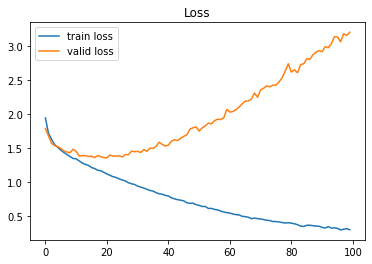

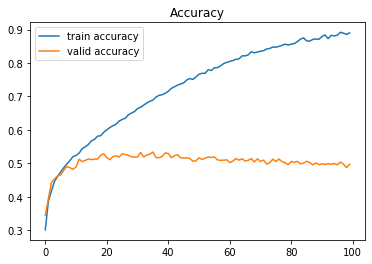

In [12]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()